# 01 · Data Preprocessing & EDA (Exploratory Data Analysis)

**Goal:** Load data, clean/aggregate to weekly, basic EDA (trends, seasonality, channel patterns), export a clean CSV.

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
sys.path.append(str(Path("..") / "src"))
from utils import load_marketing_data, make_weekly

raw = load_marketing_data("../data/marketing_data.csv")
weekly = make_weekly(raw, date_col="date")

print(weekly.head())
weekly.to_csv("../data/marketing_data_clean.csv", index=False)

        date   revenue  tv_spend  search_spend  social_spend  display_spend  \
0 2021-01-04  92990.47   9640.26       6064.77        949.22        1229.19   
1 2021-01-11  85634.73  11787.83       4500.66        491.23         176.91   
2 2021-01-18  84484.49   8866.21       8054.74       2263.99         248.70   
3 2021-01-25  88037.52   8264.93       2451.78       4416.53        3144.29   
4 2021-02-01  91586.01  12463.70       3785.30       2828.00        1461.39   

   price_index  promo  holiday  
0       100.01      1        1  
1       100.06      0        0  
2       100.04      0        0  
3        99.87      1        0  
4        99.97      0        0  


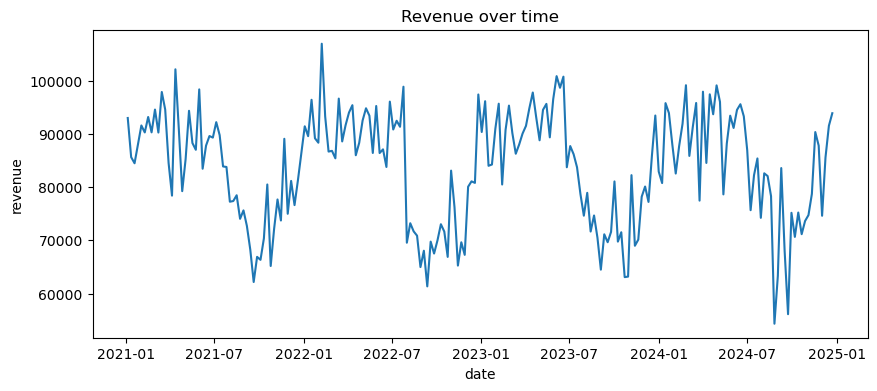

In [3]:
# Quick EDA
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(weekly["date"], weekly["revenue"])
ax.set_title("Revenue over time"); ax.set_xlabel("date"); ax.set_ylabel("revenue")
plt.show()

date             0
revenue          0
tv_spend         0
search_spend     0
social_spend     0
display_spend    0
price_index      0
promo            0
holiday          0
dtype: int64

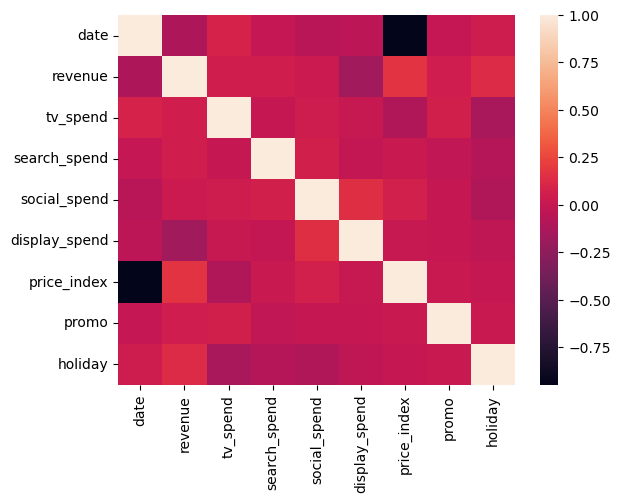

In [4]:
import seaborn as sns 

display(weekly.isna().sum())
sns.heatmap(weekly.corr(), annot=False)
plt.show()

In this step, I prepared and explored the dataset to ensure it is clean and structured for modeling:

**Data Aggregation**: Converted raw data into a consistent weekly time series (208 weeks).

**Feature Overview**: Dataset includes revenue (dependent variable), media spends (TV, Search, Social, Display), and control variables (price index, promotions, holidays).

**Trend Analysis**: Visualized revenue over time, seasonal patterns and holiday-driven peaks are evident.

**Correlation Check**: Media channels show positive correlations with revenue, while price index is negatively correlated (as expected).

**Output**: Saved the cleaned dataset as marketing_data_clean.csv for downstream modeling.